## Prequirements

In [1]:
%pip install kagglehub pandas numpy matplotlib seaborn scikit-learn textblob


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: /Users/0xdev/.pyenv/versions/3.12.2/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Introduction
Twitter bot detection is crucial for:
- Preventing misinformation spread
- Protecting real users from spam
- Maintaining platform integrity

## Define the problem

- Nowsdays, Twitter (or X) has a lot of bots or fake accounts. These accounts are created to spread misinformation, spam, or manipulate the public opinion.
- The goal is to detect these bots and take action against them.

## Find a dataset

### Dataset Citation 📝

- Dataset: [Twitter Bot Detection Dataset](https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset)  
- Author: Goyal Aditya  
- Platform: Kaggle  
- Accessed: 2025-01-19

### Dataset Information 📊

The dataset is provided in a CSV file format named 'bot_detection_dataset.csv'. It includes the following columns:

- User ID: Unique identifier for each user in the dataset.
- Username: The username associated with the user.
- Tweet: The text content of the tweet.
- Retweet Count: The number of times the tweet has been retweeted.
- Mention Count: The number of mentions in the tweet.
- Follower Count: The number of followers the user has.
- Verified: A boolean value indicating whether the user is verified or not.
- Bot Label: A label indicating whether the user is a bot (1) or not (0).
- Location: The location associated with the user.
- Created At: The date and time when the tweet was created.
- Hashtags: The hashtags associated with the tweet.

## Data Exploration

### Citation
Dataset: [Twitter Bot Detection Dataset](https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset)  
Author: Goyal Aditya  
Platform: Kaggle  
Accessed: 2025-01-19

Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.

## Download the dataset and load it

- Download the dataset from Kaggle

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("goyaladi/twitter-bot-detection-dataset")

print("Path to dataset files:", path)

/Users/0xdev/.pyenv/versions/3.12.2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/0xdev/.cache/kagglehub/datasets/goyaladi/twitter-bot-detection-dataset/versions/2


- Load the dataset using pandas

In [4]:
df = pd.read_csv(f'{path}/bot_detection_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [6]:
df.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [7]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


### Data Cleaning, Handling Missing Values, and Feature Engineering

In [8]:
import string
from textblob import TextBlob
import re

df.columns = [col.lower().replace(" ", "_") for col in df.columns]
df['location'] = df['location'].fillna('none').str.lower()
df['hashtags'] = df['hashtags'].fillna('none')
df['bot_label'] = df['bot_label'].astype(int)

df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at_date'] = df['created_at'].dt.date
df['created_at_year'] = df['created_at'].dt.year
df['created_at_month'] = df['created_at'].dt.month
df['created_at_hour'] = df['created_at'].dt.hour
df['created_at_dayofweek'] = df['created_at'].dt.dayofweek
df['created_at_is_weekend'] = df['created_at_dayofweek'].isin([5, 6]).astype(int)
df['account_age_days'] = (pd.Timestamp.now() - df['created_at']).dt.days

df['username_length'] = df['username'].apply(len)
df['username_digit_count'] = df['username'].apply(lambda x: sum(c.isdigit() for c in x))
df['username_letter_count'] = df['username'].apply(lambda x: sum(c.isalpha() for c in x))
df['username_special_char_count'] = df['username'].apply(lambda x: sum(c in string.punctuation for c in x))
df['username_digit_ratio'] = df['username_digit_count'] / df['username_length'] * 100
df['username_has_bot_pattern'] = df['username'].str.contains(r'bot|b0t|robot|_bot_', case=False).astype(int)
df['username_has_repeating_chars'] = df['username'].apply(lambda x: bool(re.search(r'(.)\1{2,}', x))).astype(int)

df['tweet_length'] = df['tweet'].apply(len)
df['tweet_digit_count'] = df['tweet'].apply(lambda x: sum(c.isdigit() for c in x))
df['tweet_letter_count'] = df['tweet'].apply(lambda x: sum(c.isalpha() for c in x))
df['tweet_punctuation_count'] = df['tweet'].apply(lambda x: sum(c in string.punctuation for c in x))
df['tweet_digit_ratio'] = df['tweet_digit_count'] / df['tweet_length'] * 100
df['tweet_word_count'] = df['tweet'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['tweet_length'] / df['tweet_word_count']
df['tweet_capital_ratio'] = df['tweet'].apply(lambda x: sum(1 for c in x if c.isupper())) / df['tweet_length']
df['tweet_punctuation_count'] = df['tweet'].apply(lambda x: sum(c in string.punctuation for c in x))
df['tweet_punctuation_ratio'] = df['tweet_punctuation_count'] / df['tweet_length']

df['hashtags_length'] = df['hashtags'].apply(len)
df['hashtags_letter_count'] = df['hashtags'].apply(lambda x: sum(c.isalpha() for c in x))

df['retweet_follower_ratio'] = df['retweet_count'] / (df['follower_count'] + 1)  # Add 1 to avoid division by zero
df['mention_tweet_ratio'] = df['mention_count'] / df['tweet_length']
df['follower_mention_ratio'] = df['follower_count'] / (df['mention_count'] + 1)  # Add 1 to avoid division by zero
df['verified_follower_ratio'] = df['verified'] / (df['follower_count'] + 1)  # Add 1 to avoid division by zero


# tweet sentiment
df['sentiment_polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)



df.head()

,user_id,username,tweet,retweet_count,mention_count,follower_count,verified,bot_label,location,created_at,...,tweet_capital_ratio,tweet_punctuation_ratio,hashtags_length,hashtags_letter_count,retweet_follower_ratio,mention_tweet_ratio,follower_mention_ratio,verified_follower_ratio,sentiment_polarity,sentiment_subjectivity
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,adkinston,2020-05-11 15:29:50,...,0.012048,0.012048,4,4,0.036109,0.012048,1176.500000,0.000000,-0.050000,0.250000
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,sanderston,2022-11-26 05:18:10,...,0.012987,0.012987,9,8,0.005718,0.064935,1602.833333,0.000104,-0.100000,0.450000
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,harrisonfurt,2022-08-08 03:16:54,...,0.016393,0.016393,11,10,0.001375,0.032787,1454.333333,0.000229,0.000000,1.000000
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,martinezberg,2021-08-14 22:27:05,...,0.020408,0.020408,18,15,0.024075,0.102041,373.666667,0.000446,0.433333,0.733333
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,camachoville,2020-04-13 21:24:21,...,0.034483,0.034483,15,14,0.003081,0.103448,2109.500000,0.000000,0.700000,0.600000


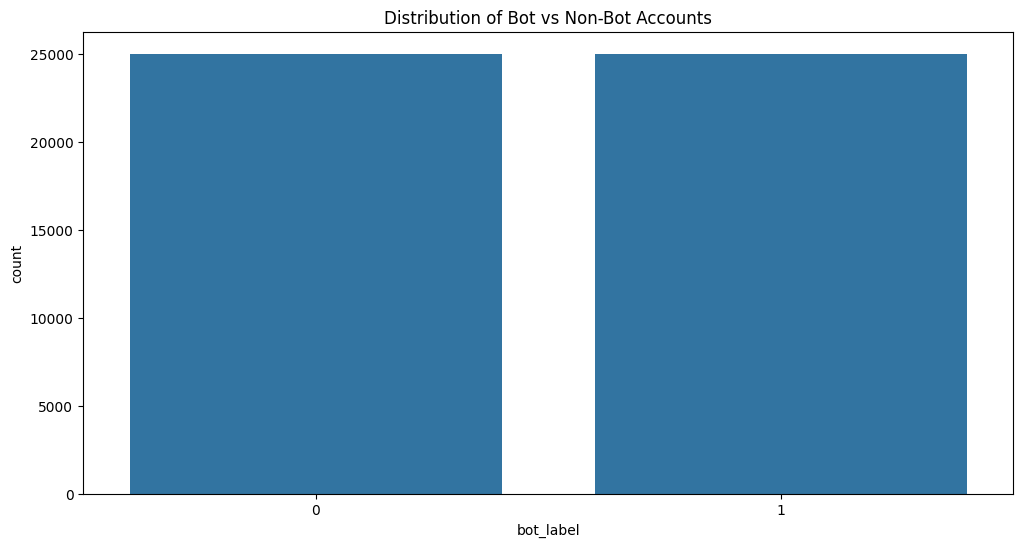

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='bot_label')
plt.title('Distribution of Bot vs Non-Bot Accounts')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       50000 non-null  int64         
 1   username                      50000 non-null  object        
 2   tweet                         50000 non-null  object        
 3   retweet_count                 50000 non-null  int64         
 4   mention_count                 50000 non-null  int64         
 5   follower_count                50000 non-null  int64         
 6   verified                      50000 non-null  bool          
 7   bot_label                     50000 non-null  int64         
 8   location                      50000 non-null  object        
 9   created_at                    50000 non-null  datetime64[ns]
 10  hashtags                      50000 non-null  object        
 11  created_at_date             

### Drop Non-Numeric and Redundant Columns

The following columns are dropped to prepare the data for machine learning:

1. Non-numeric columns:
    - user_id 
    - username
    - tweet
    - location
    - hashtags
    - created_at
    - created_at_date

2. Redundant/low correlation features:
    - username_special_char_count
    - tweet_digit_count 
    - tweet_punctuation_count
    - tweet_digit_ratio
    - tweet_word_count
    - created_at_dayofweek
    - retweet_follower_ratio 
    - username_length
    - verified
    - created_at_year
    - username_letter_count
    - verified_follower_ratio
    - mention_tweet_ratio
    - hashtags_length
    - hashtags_letter_count
    - mention_count
    - username_digit_count
    - tweet_letter_count
    - follower_mention_ratio
    - sentiment_polarity 
    - created_at_hour
    - created_at_is_weekend
    - tweet_punctuation_ratio
    - retweet_count
    - follower_count
    - account_age_days
    - tweet_length

This data cleaning ensures we have purely numeric features with meaningful correlations for our machine learning models.

- Drop the non-numeric columns to ensure we have only numeric features for machine learning.

In [11]:
df = df.drop(columns=['user_id', 'username', 'tweet', 'location', 'hashtags', 'created_at', 'created_at_date'])

/Users/0xdev/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [13 18 20 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/0xdev/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


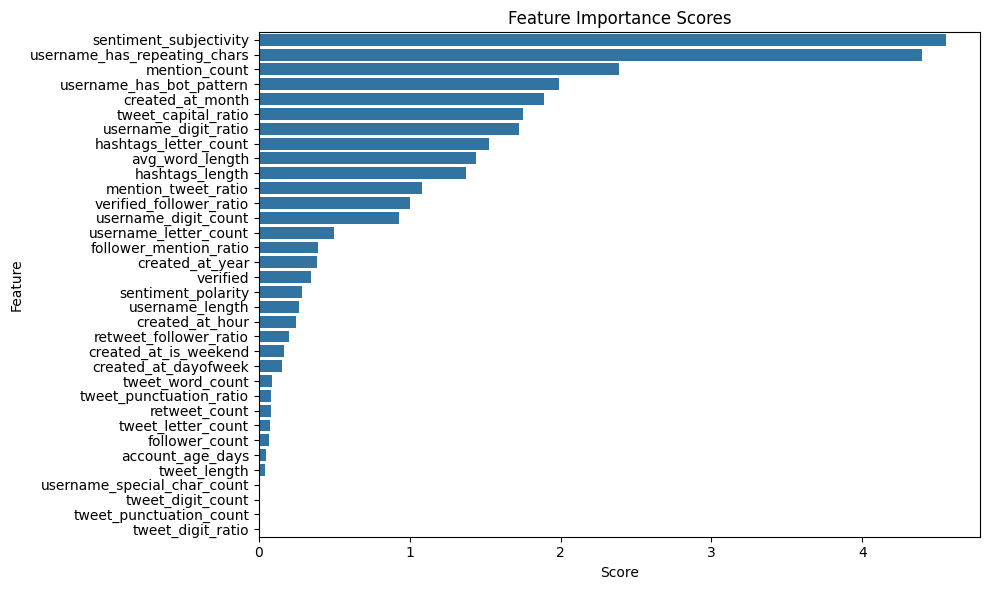


Top selected features:
                         Feature     Score
33        sentiment_subjectivity  4.552984
16  username_has_repeating_chars  4.394886
1                  mention_count  2.388983
15      username_has_bot_pattern  1.992087
5               created_at_month  1.889892
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mention_count                 50000 non-null  int64  
 1   created_at_month              50000 non-null  int32  
 2   username_has_bot_pattern      50000 non-null  int64  
 3   username_has_repeating_chars  50000 non-null  int64  
 4   sentiment_subjectivity        50000 non-null  float64
 5   bot_label                     50000 non-null  int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 2.1 MB


In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target from the current dataframe
X = df.drop(columns=['bot_label'])
y = df['bot_label']

# Create SelectKBest instance to select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)

# Fit and transform the features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Create new dataframe with selected features
X_selected = X[selected_features]

# Visualize feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance Scores')
plt.tight_layout()
plt.show()

# Print selected features and their scores
print("\nTop selected features:")
print(feature_scores.head())

# Create final dataset with selected features
final_df = pd.concat([X_selected, y], axis=1)
final_df.info()

## Split the Data into Training and Testing Sets

In [13]:
X = final_df.drop(columns=['bot_label'])
y = final_df['bot_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# print the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 5)
X_test shape: (10000, 5)
y_train shape: (40000,)
y_test shape: (10000,)


## Model Selection

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define models
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42),
    'RBF_SVC': SVC(kernel='rbf', random_state=42),
    'LinearSVC': LinearSVC(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print()

Model: RandomForestClassifier
accuracy: 0.5047
precision: 0.5080
recall: 0.4970
roc_auc: 0.5047

Model: LogisticRegression
accuracy: 0.5011
precision: 0.5044
recall: 0.4853
roc_auc: 0.5012

Model: RBF_SVC
accuracy: 0.5015
precision: 0.5037
recall: 0.6312
roc_auc: 0.5007

Model: LinearSVC
accuracy: 0.5009
precision: 0.5044
recall: 0.4632
roc_auc: 0.5011



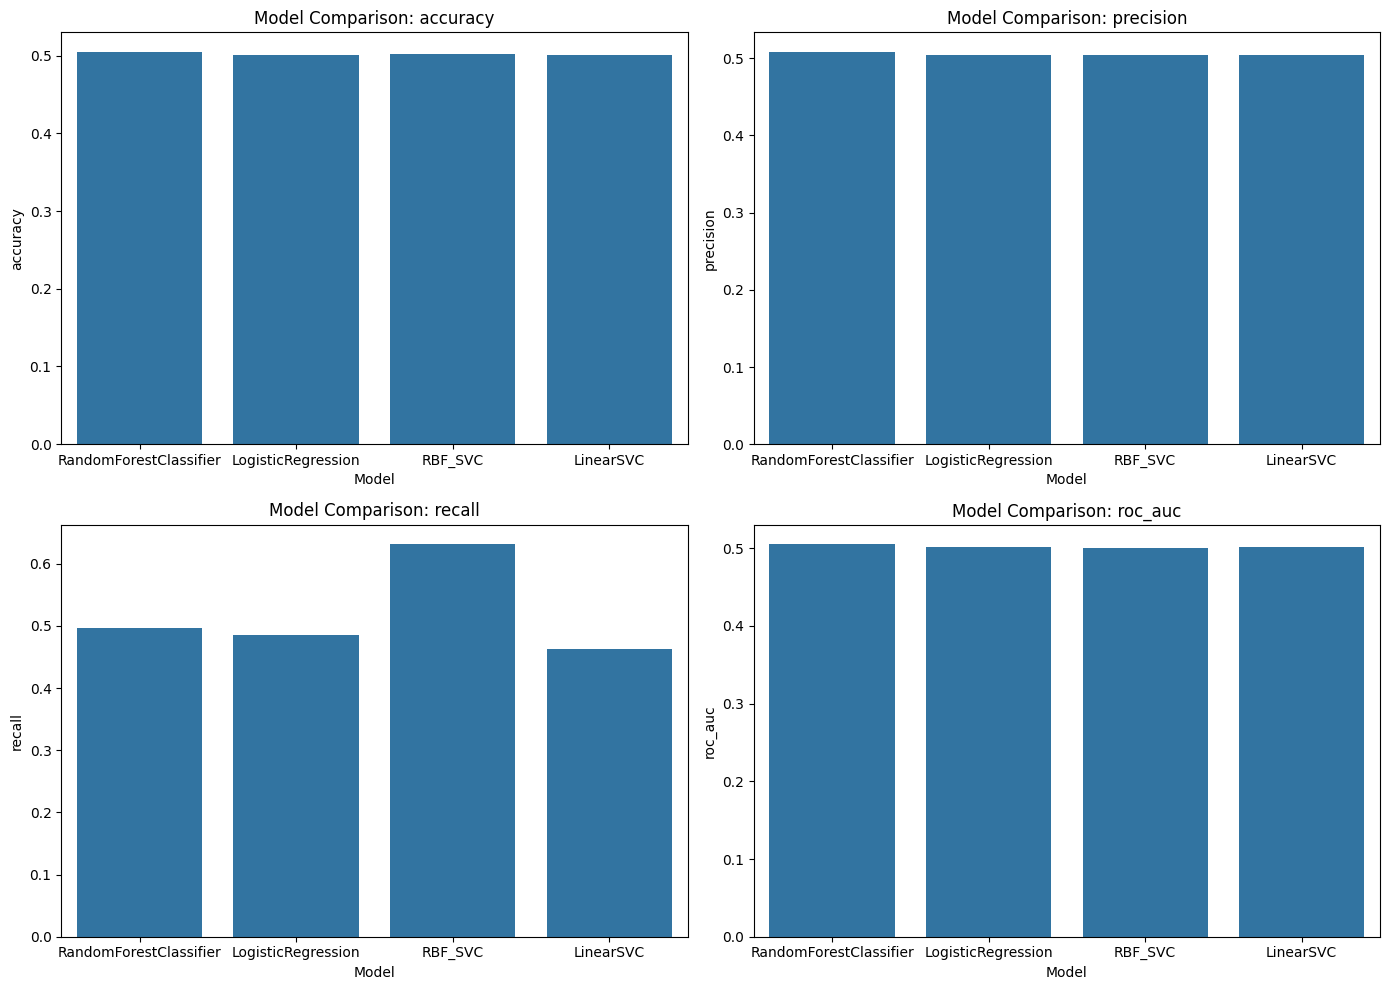

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Plot the results
metrics = ['accuracy', 'precision', 'recall', 'roc_auc']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax)
    ax.set_title(f'Model Comparison: {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')

plt.tight_layout()
plt.show()

## Tune the hyperparameters of SVC (Support Vector Classifier)

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score

# Define parameter grid
C_range = np.logspace(-5, 5, num=11, base=2)
gamma_range = np.logspace(-5, 5, num=11, base=2)
param_grid = {
    'C': C_range,
    'gamma': gamma_range,
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(kernel='rbf', random_state=42),
    param_grid=param_grid,
    cv=3, # K-fold cross-validation
    scoring='recall',  # optimize for recall since it's important for bot detection
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Print results
print("\nBest parameters:", grid_search.best_params_)
print("\nBest cross-validation score:", grid_search.best_score_)
print("\nPerformance metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("\nDetailed classification report:")
print(classification_report(y_test, y_pred))


Best parameters: {'C': 32.0, 'gamma': 0.03125}

Best cross-validation score: 0.6647653357350145

Performance metrics:
Accuracy: 0.5044
Precision: 0.5058678196417542
Recall: 0.651033386327504
ROC AUC: 0.503455501537343

Detailed classification report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42      4968
           1       0.51      0.65      0.57      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



In [ ]:
from sklearn.model_selection import cross_val_score

recall_scores = cross_val_score(best_model, X, y, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {recall_scores}")
print(f"Mean recall_scores: {recall_scores.mean()}")

## Train the model (without using the fine-tuned hyperparameters)

For bot detection, use recall as primary scoring metric since false negatives (missing bots) are more critical than false positives.

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize best model
# Best parameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
model = SVC(kernel='rbf', random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['Not Bot (0)', 'Bot (1)']))



recall_scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {recall_scores}")
print(f"Mean recall_scores: {recall_scores.mean()}")

Accuracy: 0.5015
Precision: 0.5037272006344171
Recall: 0.6311605723370429
ROC AUC: 0.5006648272313234
              precision    recall  f1-score   support

 Not Bot (0)       0.50      0.37      0.42      4968
     Bot (1)       0.50      0.63      0.56      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000

Cross-validation recall scores: [0.71103118 0.67985612 0.86570743 0.56126324 0.78392964]
Mean recall_scores: 0.7203575216980125


## Conclusion

The Support Vector Classifier (SVC) achieved an accuracy of 0.50 and an AUC score of 0.50, indicating that its overall predictive performance is close to random guessing. However, since recall was prioritized for bot detection, the model performed better in identifying bots, achieving a recall of 0.63 on the test set and a mean recall of 0.72 across cross-validation. This suggests that the model is effective at capturing bots but at the cost of lower precision.

To further improve performance:

- Enhance Features – Introduce new, more relevant features.
- Address Class Imbalance – Use resampling techniques or adjust class weights.
- Optimize Model Complexity – Experiment with different kernels, feature scaling, and hyperparameters.
- Test Alternative Models – Explore tree-based models (e.g. Random Forest) or deep learning.
- Leverage More Data – Incorporate additional behavioral signals or external datasets.